In [8]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
SQB= pd.read_excel("Steel-express.xlsx","SQUARE BOXES")

In [10]:
SQB

,Date,Weeks,type,purchases(kg),sales(kg),stock,price for sales(EGP),price for purchases(EGP),Total Sales(EGP),Total Purchases(EGP),Average price,Average price for sales
0,2023-01-01,1,SQUARE BOXES,18483,0,12720.00,0.0,40.5,0.0,748561.5,40.500000,44.500000
1,2023-01-16,3,SQUARE BOXES,15044,0,22975.00,0.0,40.3,0.0,606273.2,40.410257,44.300000
2,2023-01-16,3,SQUARE BOXES,5150,0,27185.00,0.0,42.8,0.0,220420.0,40.728461,44.200000
3,2023-01-16,3,SQUARE BOXES,0,20957,12720.00,44.7,0.0,936777.9,0.0,40.410257,44.700000
4,2023-01-17,3,SQUARE BOXES,770,0,13421.60,0.0,42.5,0.0,32725.0,40.763042,44.450000
...,...,...,...,...,...,...,...,...,...,...,...,...
90,2023-11-11,45,SQUARE BOXES,0,259,870.16,46.7,0.0,12095.3,0.0,41.486055,45.302453
91,2023-11-15,46,SQUARE BOXES,6570,0,5350.16,0.0,41.7,0.0,273969.0,41.478958,45.302453
92,2023-11-15,46,SQUARE BOXES,0,6607,870.16,45.1,0.0,297975.7,0.0,41.482507,45.302453
93,2023-11-16,46,SQUARE BOXES,5108,0,5360.16,0.0,40.5,0.0,206874.0,41.471198,45.302453


In [11]:
SQB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      95 non-null     datetime64[ns]
 1   Weeks                     95 non-null     int64         
 2   type                      95 non-null     object        
 3   purchases(kg)             95 non-null     int64         
 4   sales(kg)                 95 non-null     int64         
 5   stock                     95 non-null     float64       
 6   price for sales(EGP)      95 non-null     float64       
 7   price for purchases(EGP)  95 non-null     float64       
 8   Total Sales(EGP)          95 non-null     float64       
 9   Total Purchases(EGP)      95 non-null     float64       
 10  Average price             95 non-null     float64       
 11  Average price for sales   95 non-null     float64       
dtypes: datetime64[ns](1), fl

In [12]:
SQB.isnull().sum()

Date                        0
Weeks                       0
type                        0
purchases(kg)               0
sales(kg)                   0
stock                       0
price for sales(EGP)        0
price for purchases(EGP)    0
Total Sales(EGP)            0
Total Purchases(EGP)        0
Average price               0
Average price for sales     0
dtype: int64

In [13]:
## Filling Mising DATA WITH 0

SQB['price for sales(EGP)'].fillna(0,inplace=True)

SQB['price for purchases(EGP)'].fillna(0,inplace=True)


## EDA

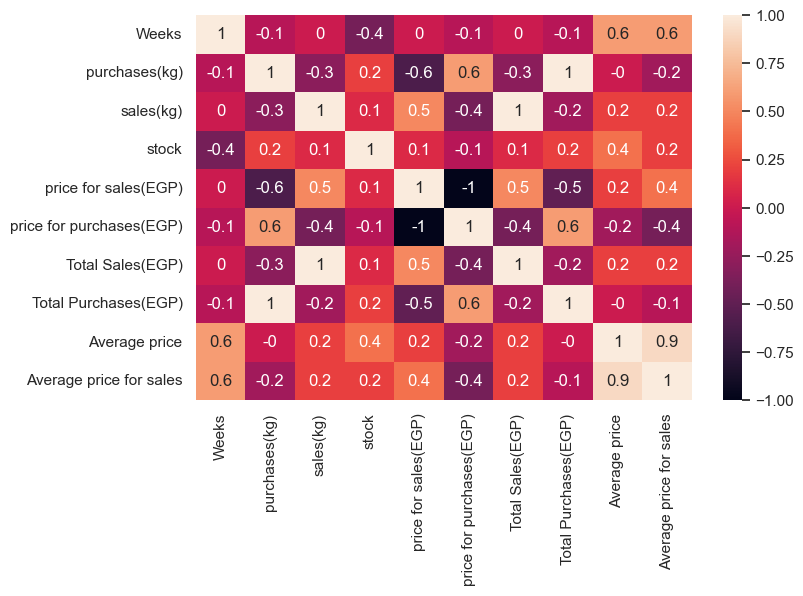

In [14]:
## correlation_matrix to see the correlation between columns
correlation_matrix = SQB.corr().round(1)
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(data=correlation_matrix, annot=True);

## Data Visualization"

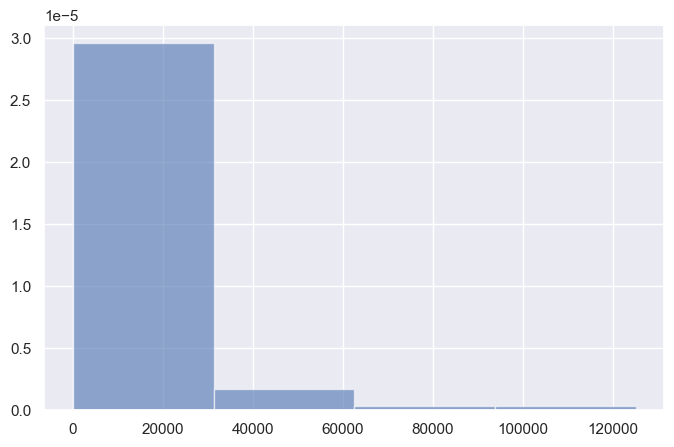

In [15]:

SQB_PUR = SQB['purchases(kg)']  

plt.hist(SQB_PUR, bins=4, density=True, alpha=0.6, color='b')

plt.show()


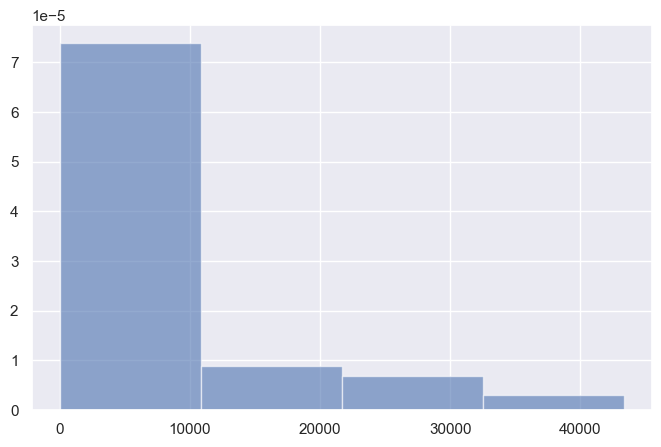

In [16]:

SQB_SALES = SQB['sales(kg)']  


plt.hist(SQB_SALES, bins=4, density=True, alpha=0.6, color='b')

plt.show()


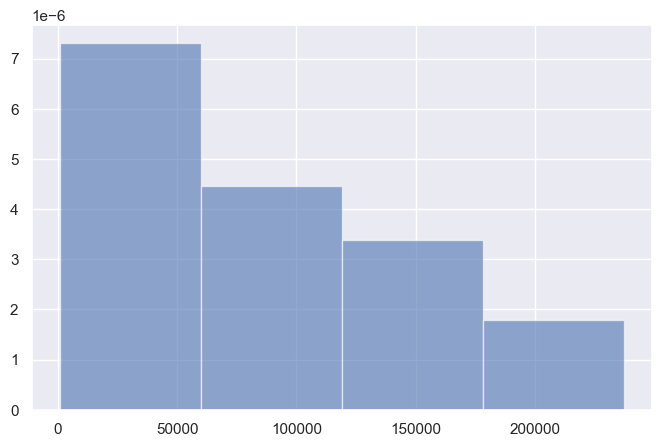

In [17]:

SQB_stock = SQB['stock']  
plt.hist(SQB_stock, bins=4, density=True, alpha=0.6, color='b')

plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\2411559587.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SQB.groupby('type')['Total Sales(EGP)','Total Purchases(EGP)'].sum())


<AxesSubplot:xlabel='type'>

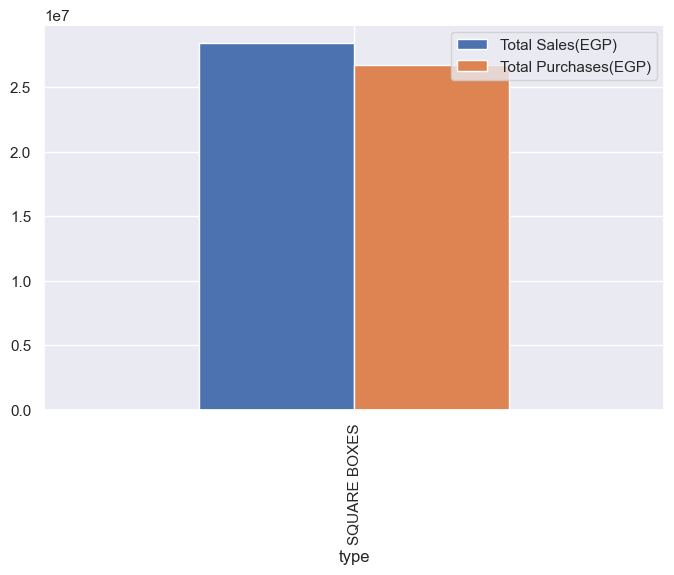

In [18]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(SQB.groupby('type')['Total Sales(EGP)','Total Purchases(EGP)'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\2012587820.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SQB.groupby('type')['Average price','Average price for sales'].mean())


<AxesSubplot:xlabel='type'>

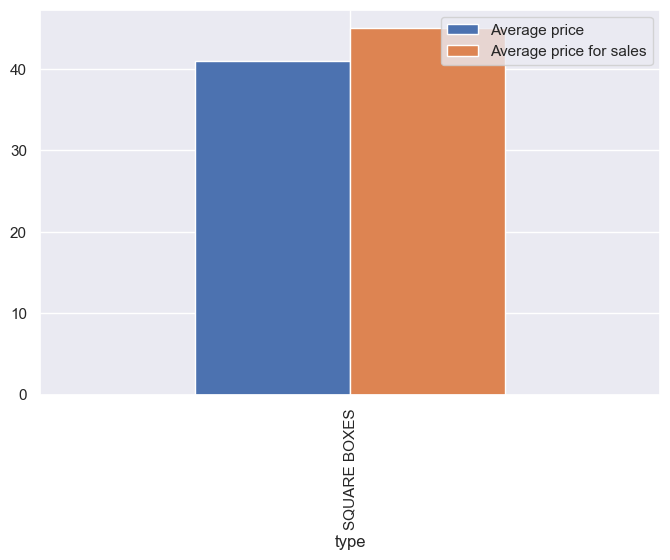

In [19]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(SQB.groupby('type')['Average price','Average price for sales'].mean())
sum_by_type.plot(kind="bar")

## Sales_over_Time

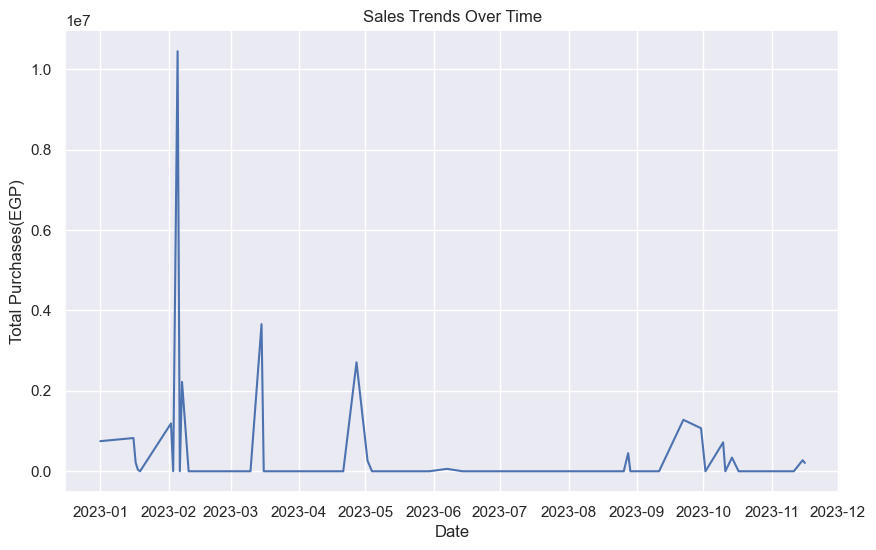

In [20]:
#the best season comes at qtr3 of each year the most selling part of the year 

SQB['Date'] = pd.to_datetime(SQB['Date'])

sales_by_date = SQB.groupby('Date')['Total Purchases(EGP)'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Purchases(EGP)'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchases(EGP)')
plt.grid(True)
plt.show()

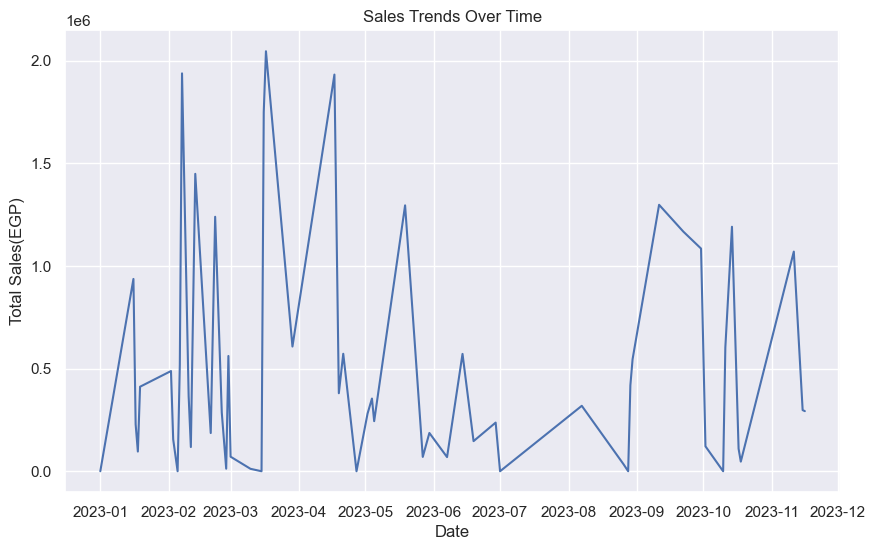

In [21]:
#the best season comes at qtr3 of each year the most selling part of the year 

SQB['Date'] = pd.to_datetime(SQB['Date'])

sales_by_date = SQB.groupby('Date')['Total Sales(EGP)'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Sales(EGP)'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales(EGP)')
plt.grid(True)
plt.show()

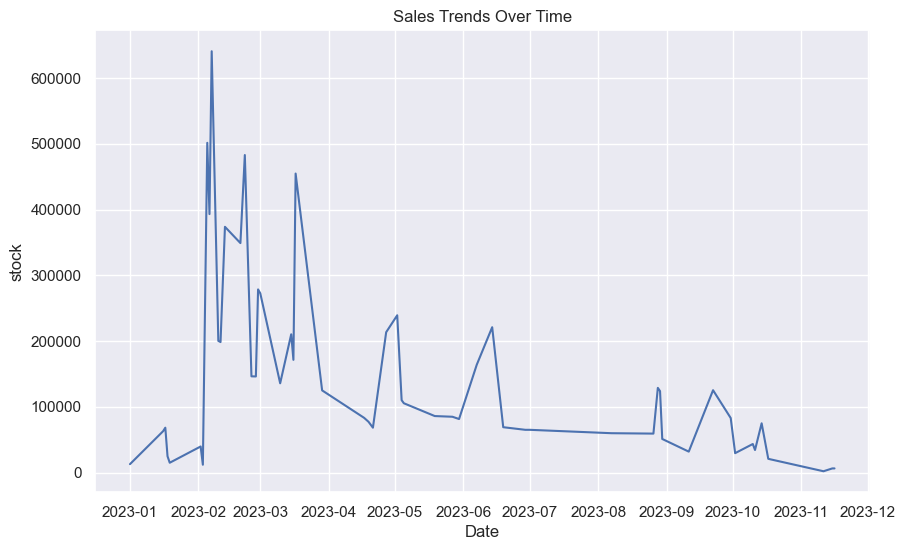

In [22]:
#the best season comes at qtr3 of each year the most selling part of the year 

SQB['Date'] = pd.to_datetime(SQB['Date'])

sales_by_date = SQB.groupby('Date')['stock'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['stock'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('stock')
plt.grid(True)
plt.show()

In [23]:
SQB_PV= pd.read_excel("ST-EXPRSS-PV.xlsx","SQUARE BOXES")

In [24]:
SQB_PV.head(7)

,purchases(kg),sales(kg),Stock,Holding,Order_Cost(EGP),New_Purchase,New_Stock,NEW_HOLDING,NEW_ORDER_COST,type,Week
0,18483,0,18483,5544.9,53527,80480.730287,80480.730287,24144.219086,233073,SQUARE BOXES,1
1,26334,37375,7442,13445.1,76264,0.000000,43105.730287,24144.219086,0,SQUARE BOXES,2
2,28242,14381,21303,10705.2,81789,0.000000,28724.730287,12931.719086,0,SQUARE BOXES,3
3,305530,64725,262108,98049.9,884819,0.000000,-36000.269713,29258.882148,0,SQUARE BOXES,4
4,0,31872,230236,78632.4,0,80480.730287,48608.730287,24144.219086,233073,SQUARE BOXES,5
5,0,37551,192685,69070.8,0,0.000000,11057.730287,14582.619086,0,SQUARE BOXES,6
6,0,13832,178853,57805.5,0,0.000000,-2774.269713,4908.001219,0,SQUARE BOXES,7


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\2090098282.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SQB_PV.groupby('type')['purchases(kg)','New_Purchase'].sum())


<AxesSubplot:xlabel='type'>

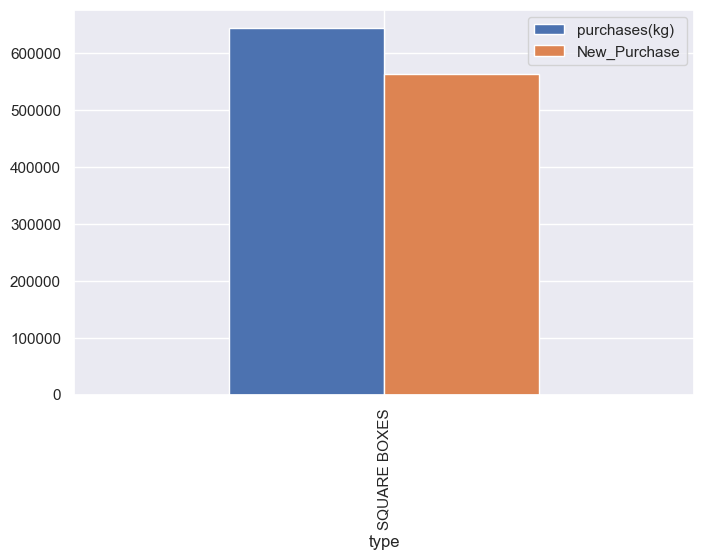

In [25]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(SQB_PV.groupby('type')['purchases(kg)','New_Purchase'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\403424221.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SQB_PV.groupby('type')['Order_Cost(EGP)','NEW_ORDER_COST'].sum())


<AxesSubplot:xlabel='type'>

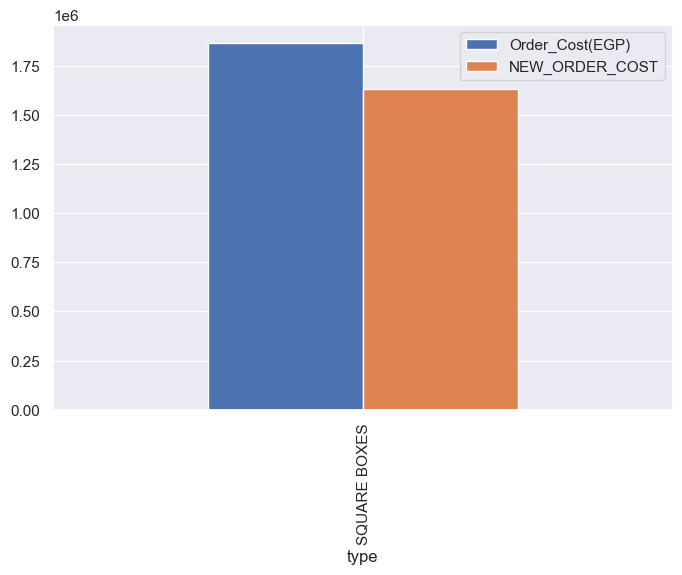

In [26]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(SQB_PV.groupby('type')['Order_Cost(EGP)','NEW_ORDER_COST'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\1518839602.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SQB_PV.groupby('type')['Holding','NEW_HOLDING'].sum())


<AxesSubplot:xlabel='type'>

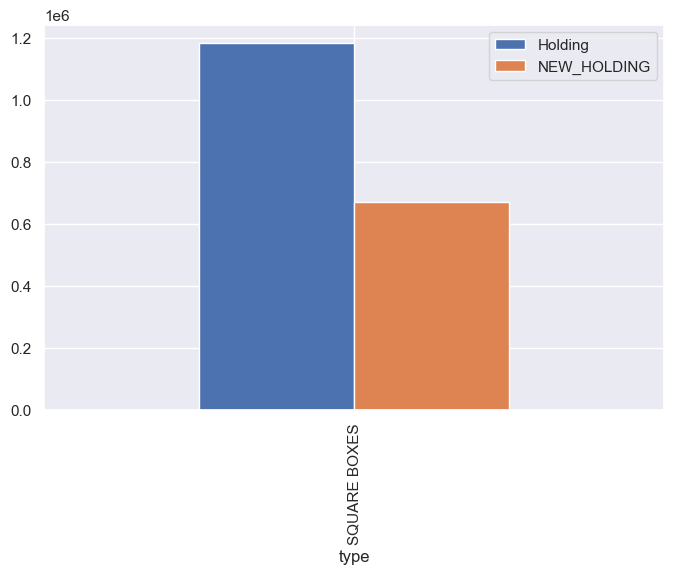

In [27]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(SQB_PV.groupby('type')['Holding','NEW_HOLDING'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\3241810679.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SQB_PV.groupby('type')['Stock','New_Stock'].sum())


<AxesSubplot:xlabel='type'>

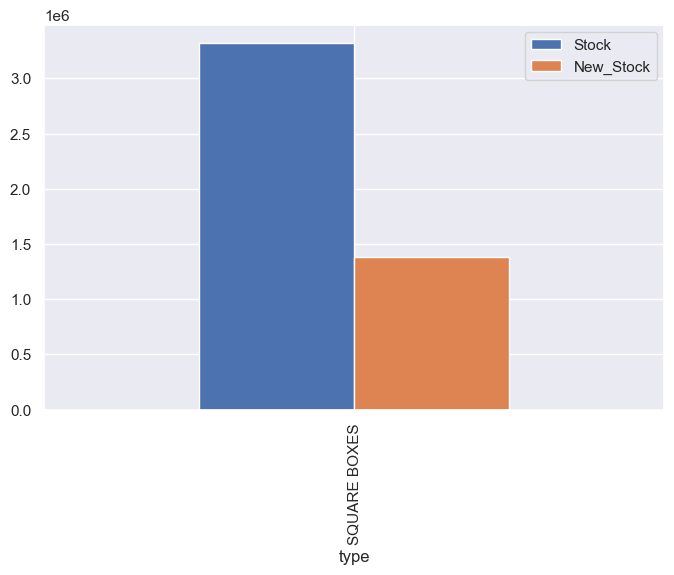

In [28]:
sum_by_type = round(SQB_PV.groupby('type')['Stock','New_Stock'].sum())
sum_by_type.plot(kind="bar")

## Time_series

In [29]:
SQB_PV.columns

Index(['purchases(kg)', 'sales(kg)', 'Stock', 'Holding', 'Order_Cost(EGP)',
       'New_Purchase', 'New_Stock', 'NEW_HOLDING', 'NEW_ORDER_COST', 'type',
       'Week'],
      dtype='object')

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\2316274543.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SQB_PV.groupby('Week')['Stock', 'New_Stock'].sum().reset_index()


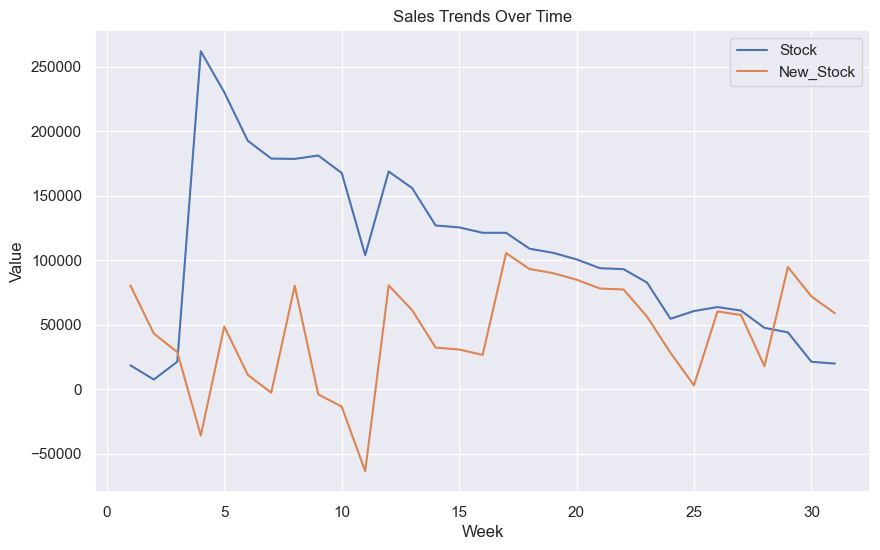

In [30]:
# Group by week and calculate the sum of each column
sales_by_week = SQB_PV.groupby('Week')['Stock', 'New_Stock'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Sales Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\4246408478.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SQB_PV.groupby('Week')['Holding', 'NEW_HOLDING'].sum().reset_index()


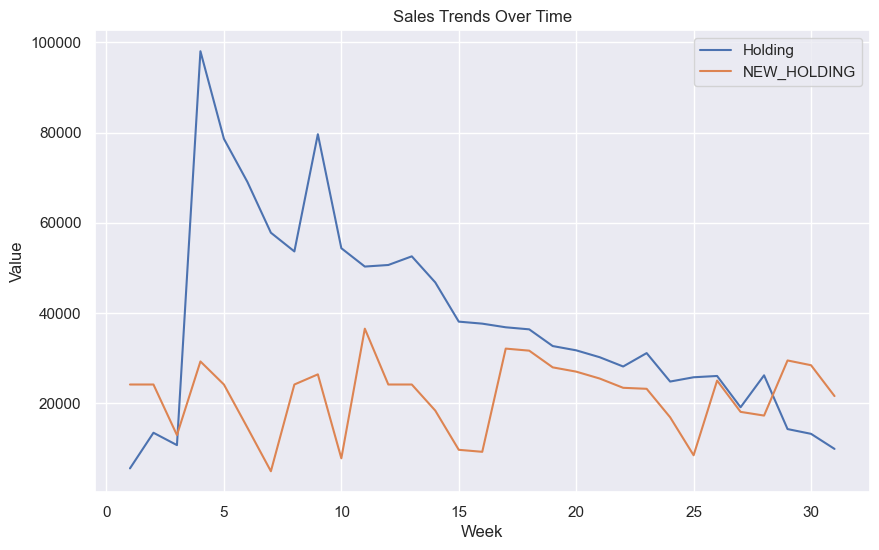

In [31]:
# Group by week and calculate the sum of each column
sales_by_week = SQB_PV.groupby('Week')['Holding', 'NEW_HOLDING'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Sales Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\2435450351.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SQB_PV.groupby('Week')['Order_Cost(EGP)', 'NEW_ORDER_COST'].sum().reset_index()


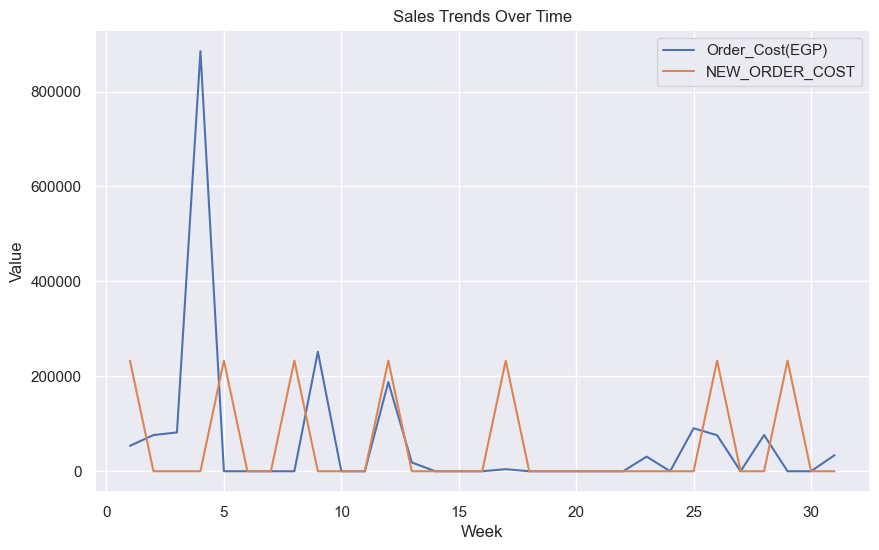

In [32]:
# Group by week and calculate the sum of each column
sales_by_week = SQB_PV.groupby('Week')['Order_Cost(EGP)', 'NEW_ORDER_COST'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Sales Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_10848\2653545554.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SQB_PV.groupby('Week')['purchases(kg)', 'New_Purchase'].sum().reset_index()


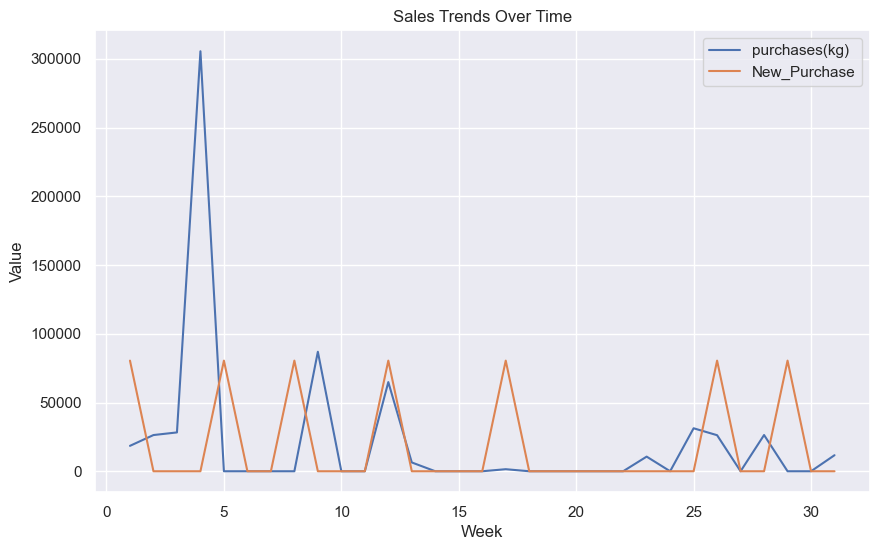

In [33]:
# Group by week and calculate the sum of each column
sales_by_week = SQB_PV.groupby('Week')['purchases(kg)', 'New_Purchase'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Sales Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


## Box-plots 

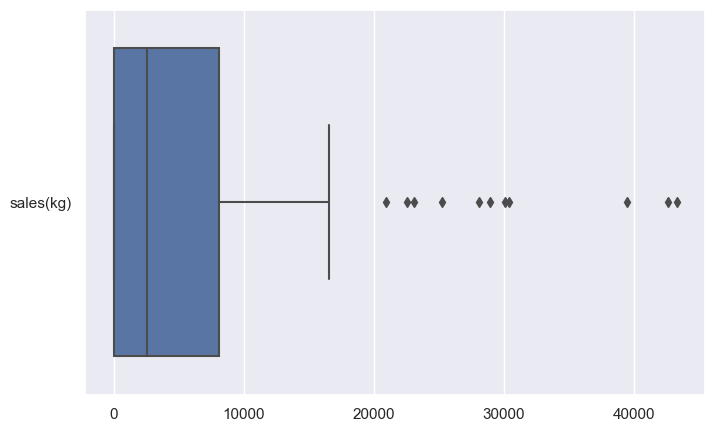

In [34]:
sns.boxplot(data=SQB[["sales(kg)"]], orient="h")
plt.show()

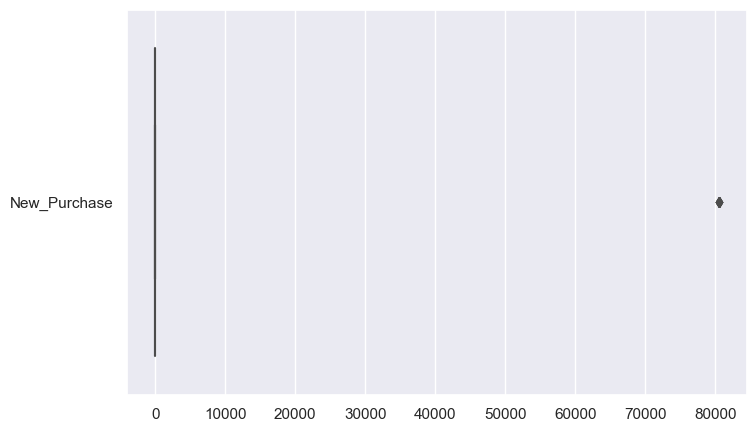

In [36]:
sns.boxplot(data=SQB_PV[["New_Purchase"]], orient="h")
plt.show()

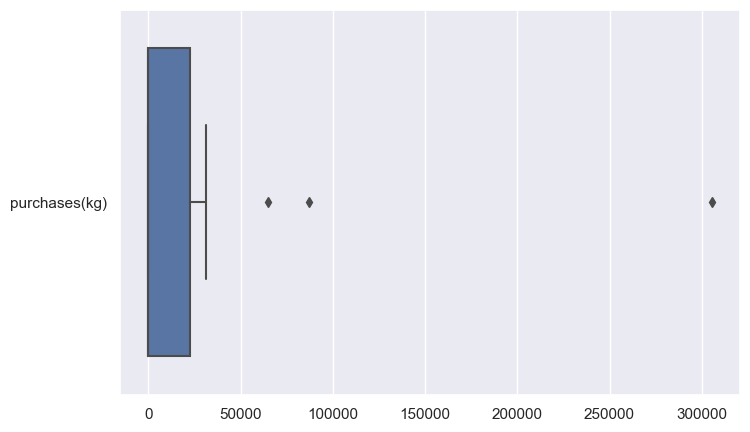

In [37]:
sns.boxplot(data=SQB_PV[["purchases(kg)"]], orient="h")
plt.show()

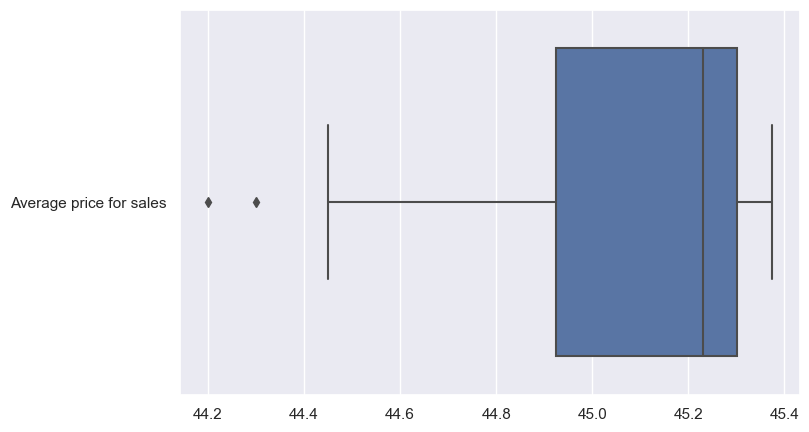

In [38]:
sns.boxplot(data=SQB[["Average price for sales"]], orient="h")
plt.show()